In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans

# Fetching Data

In [168]:
data = pd.read_csv("tennis_articles_v4.csv")

In [169]:
# viewing data example to know how our data actually lools like
data.head()

,article_id,article_text
0,1,In Drama every world is a stage.
1,2,Everyone on the stage is doing drama .
2,3,Every world is a stage and is commonly said i...
3,4,The world commonly revolves around Drama and S...
4,5,Drama in every world leads to removal of stage...


In [170]:
#splitting the documents into list of sentences.
sentences = [] 
for s in data['article_text']:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [171]:
sentences[:5]

[['In Drama every world is a stage.'],
 ['Everyone on the stage is doing drama .'],
 ['Every world is a  stage and is commonly said in drama.'],
 ['The world commonly revolves around Drama and Stage.'],
 ['Drama in every world leads to removal of stage fear.']]

In [172]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['In', 'Drama', 'every', 'world', 'is', 'a', 'stage', '.'],
 ['Everyone', 'on', 'the', 'stage', 'is', 'doing', 'drama', '.'],
 ['Every',
  'world',
  'is',
  'a',
  'stage',
  'and',
  'is',
  'commonly',
  'said',
  'in',
  'drama',
  '.'],
 ['The',
  'world',
  'commonly',
  'revolves',
  'around',
  'Drama',
  'and',
  'Stage',
  '.'],
 ['Drama',
  'in',
  'every',
  'world',
  'leads',
  'to',
  'removal',
  'of',
  'stage',
  'fear',
  '.'],
 ['Every',
  'where',
  'in',
  'the',
  'world',
  'Drama',
  'is',
  'performed',
  'with',
  'great',
  'pomp',
  'and',
  'show',
  '.'],
 ['Character',
  'building',
  'is',
  'an',
  'integral',
  'part',
  'of',
  'Drama',
  'which',
  'is',
  'included',
  'in',
  'every',
  'part',
  'of',
  'the',
  'world',
  '.'],
 ['Setting',
  'of',
  'the',
  'Stage',
  'is',
  'very',
  'important',
  'in',
  'drama',
  '.'],
 ['Language',
  'of',
  'the',
  'play',
  'in',
  'Drama',
  'is',
  'very',
  'important',
  'as',
  'it',
  'is',
  

In [173]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [174]:
filtered_sentence

[['In', 'Drama', 'every', 'world', 'stage', '.'],
 ['Everyone', 'stage', 'drama', '.'],
 ['Every', 'world', 'stage', 'commonly', 'said', 'drama', '.'],
 ['The', 'world', 'commonly', 'revolves', 'around', 'Drama', 'Stage', '.'],
 ['Drama', 'every', 'world', 'leads', 'removal', 'stage', 'fear', '.'],
 ['Every', 'world', 'Drama', 'performed', 'great', 'pomp', 'show', '.'],
 ['Character',
  'building',
  'integral',
  'part',
  'Drama',
  'included',
  'every',
  'part',
  'world',
  '.'],
 ['Setting', 'Stage', 'important', 'drama', '.'],
 ['Language',
  'play',
  'Drama',
  'important',
  'considered',
  'integral',
  'part',
  'every',
  'part',
  'world',
  '.'],
 ['Drama',
  'leads',
  'overall',
  'devlopment',
  'individual',
  'practiswed',
  'every',
  'part',
  'world',
  '.'],
 ['The',
  'Discipline',
  ',',
  'Dedication',
  ',',
  'Organization',
  'sense',
  'collaboartion',
  'Theatre',
  'requires',
  'ar',
  'qualities',
  'easily',
  'transfer',
  'number',
  'fields',
  '

In [175]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [176]:
stemmed_sentences

[['In', 'drama', 'everi', 'world', 'stage', '.'],
 ['everyon', 'stage', 'drama', '.'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama', '.'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage', '.'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear', '.'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show', '.'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world',
  '.'],
 ['set', 'stage', 'import', 'drama', '.'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world',
  '.'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world',
  '.'],
 ['the',
  'disciplin',
  ',',
  'dedic',
  ',',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field',
  '.'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',

In [177]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [178]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['in', 'drama', 'everi', 'world', 'stage'],
 ['everyon', 'stage', 'drama'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world'],
 ['set', 'stage', 'import', 'drama'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world'],
 ['the',
  'disciplin',
  'dedic',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',
  'individu',
  'lifei e ',
  'disciplin',
  'dedic',
  'organ',
  'sens',
 

In [179]:
(line)

[['in', 'drama', 'everi', 'world', 'stage'],
 ['everyon', 'stage', 'drama'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world'],
 ['set', 'stage', 'import', 'drama'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world'],
 ['the',
  'disciplin',
  'dedic',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',
  'individu',
  'lifei e ',
  'disciplin',
  'dedic',
  'organ',
  'sens',
 

In [180]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [181]:
Distinct_Words

['know',
 'young',
 'advertis',
 'actor ',
 'the',
 'power',
 'includ',
 'term',
 'also',
 'inmto',
 'number',
 'mass',
 'remov',
 'organ',
 'succes',
 'embib',
 'live',
 'us',
 'influenti',
 'transfer',
 'perosan',
 'requir',
 'therer',
 'need',
 'indep',
 'strong',
 'collabor',
 'pomp',
 'enertatin',
 'revolv',
 'ar',
 'take',
 'type',
 'way',
 'actress',
 'amaz',
 'everyon',
 'stage',
 'ddsc',
 'file',
 'biopic',
 'newspaer',
 'languag',
 'show',
 'issu',
 'fiction',
 'e ',
 'drama',
 'around',
 'consid',
 'non',
 'india',
 'tool',
 'sc',
 'great',
 'film',
 'disciplin',
 'charact',
 'main',
 'cinema',
 'newspap',
 'era',
 'activ',
 'freedom',
 'lead',
 'four',
 'role',
 'struggl',
 'measur',
 'mirror',
 'inspir',
 'artist',
 'qualiti',
 'inform',
 'rais',
 'program',
 'i e ',
 'lovinf',
 'individu',
 'address',
 'bone',
 'enertain',
 'key',
 'knowledg',
 'i',
 'mani',
 'import',
 'fear',
 'social',
 'enter',
 'to',
 'commonli',
 'build',
 'opf',
 'field',
 'one',
 'pactic',
 'india

In [182]:
(words)

['in',
 'drama',
 'everi',
 'world',
 'stage',
 'everyon',
 'stage',
 'drama',
 'everi',
 'world',
 'stage',
 'commonli',
 'said',
 'drama',
 'the',
 'world',
 'commonli',
 'revolv',
 'around',
 'drama',
 'stage',
 'drama',
 'everi',
 'world',
 'lead',
 'remov',
 'stage',
 'fear',
 'everi',
 'world',
 'drama',
 'perform',
 'great',
 'pomp',
 'show',
 'charact',
 'build',
 'integr',
 'part',
 'drama',
 'includ',
 'everi',
 'part',
 'world',
 'set',
 'stage',
 'import',
 'drama',
 'languag',
 'play',
 'drama',
 'import',
 'consid',
 'integr',
 'part',
 'everi',
 'part',
 'world',
 'drama',
 'lead',
 'overal',
 'devlop',
 'individu',
 'practisw',
 'everi',
 'part',
 'world',
 'the',
 'disciplin',
 'dedic',
 'organ',
 'sens',
 'collaboart',
 'theatr',
 'requir',
 'ar',
 'qualiti',
 'easili',
 'transfer',
 'number',
 'field',
 'theatr',
 'lead',
 'key',
 'four',
 'term',
 'import',
 'individu',
 'lifei e ',
 'disciplin',
 'dedic',
 'organ',
 'sens',
 'collabor',
 'qualiti',
 'requir',
 'wor

In [183]:
len(line)

39

## Visualizing Data

In [184]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])
    

0 know
1 young
2 advertis
3 actor 
4 the
5 power
6 includ
7 term
8 also
9 inmto
10 number
11 mass
12 remov
13 organ
14 succes
15 embib
16 live
17 us
18 influenti
19 transfer
20 perosan
21 requir
22 therer
23 need
24 indep
25 strong
26 collabor
27 pomp
28 enertatin
29 revolv
30 ar
31 take
32 type
33 way
34 actress
35 amaz
36 everyon
37 stage
38 ddsc
39 file
40 biopic
41 newspaer
42 languag
43 show
44 issu
45 fiction
46 e 
47 drama
48 around
49 consid
50 non
51 india
52 tool
53 sc
54 great
55 film
56 disciplin
57 charact
58 main
59 cinema
60 newspap
61 era
62 activ
63 freedom
64 lead
65 four
66 role
67 struggl
68 measur
69 mirror
70 inspir
71 artist
72 qualiti
73 inform
74 rais
75 program
76 i e 
77 lovinf
78 individu
79 address
80 bone
81 enertain
82 key
83 knowledg
84 i
85 mani
86 import
87 fear
88 social
89 enter
90 to
91 commonli
92 build
93 opf
94 field
95 one
96 pactic
97 indian
98 boost
99 lifei e 
100 set
101 educ
102 abbrev
103 collbaor
104 must
105 etc
106 radio
107 trm
108 pro

In [185]:
word_occurance_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_occurance_matrix.fill(0)

In [186]:
for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_occurance_matrix[i][x] = word_occurance_matrix[i][x] +1
                continue

In [187]:
print(word_occurance_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


# okapi BM25

In [188]:
word_weight_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_weight_matrix.fill(0)
    
    
avg_length=np.mean(word_occurance_matrix.sum(axis=1))
    
length_size=np.array(1.5*word_occurance_matrix.sum(axis=1)/avg_length)
    
    
    
isf=np.array(np.log(len(line)/np.count_nonzero(word_occurance_matrix,axis=0)))
denominator=np.empty(shape=(len(line),len(Distinct_Words)))
for i in range(len(line)):
    denominator[i,:]=(word_occurance_matrix[i,:]+length_size[i]+0.5)
    
word_weight_matrix=(word_occurance_matrix*isf)/(denominator)
word_weight_matrix    

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.05508555,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.88551823]])

# RNN Similarity measure 

In [189]:
sum_weights=np.sum(word_weight_matrix,axis=1)

product_weight=np.empty(shape=(len(line),len(line)))
for i in range(len(line)):
    for j in range(len(line)):
        product_weight[i][j]=sum(word_weight_matrix[i,:]*word_weight_matrix[j,:])
product_weight
similarity_matrix=np.empty(shape=np.shape(product_weight))

In [190]:
for i in range(len(line)):
    for j in range(len(line)):
        similarity_matrix[i,j]= 1-((2*(sum_weights[i] - product_weight[i,j])*(sum_weights[j] - product_weight[i,j]))/((sum_weights[i]*(sum_weights[j] - product_weight[i,j])) + (sum_weights[j]*(sum_weights[i] - product_weight[i,j]))))
similarity_matrix

array([[0.8888108 , 0.26620206, 0.39101882, ..., 0.        , 0.        ,
        0.        ],
       [0.26620206, 1.36906509, 0.22504608, ..., 0.        , 0.        ,
        0.        ],
       [0.39101882, 0.22504608, 1.02403818, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.9748265 , 0.11426364,
        0.2173827 ],
       [0.        , 0.        , 0.        , ..., 0.11426364, 1.02915474,
        0.02549432],
       [0.        , 0.        , 0.        , ..., 0.2173827 , 0.02549432,
        0.69790252]])

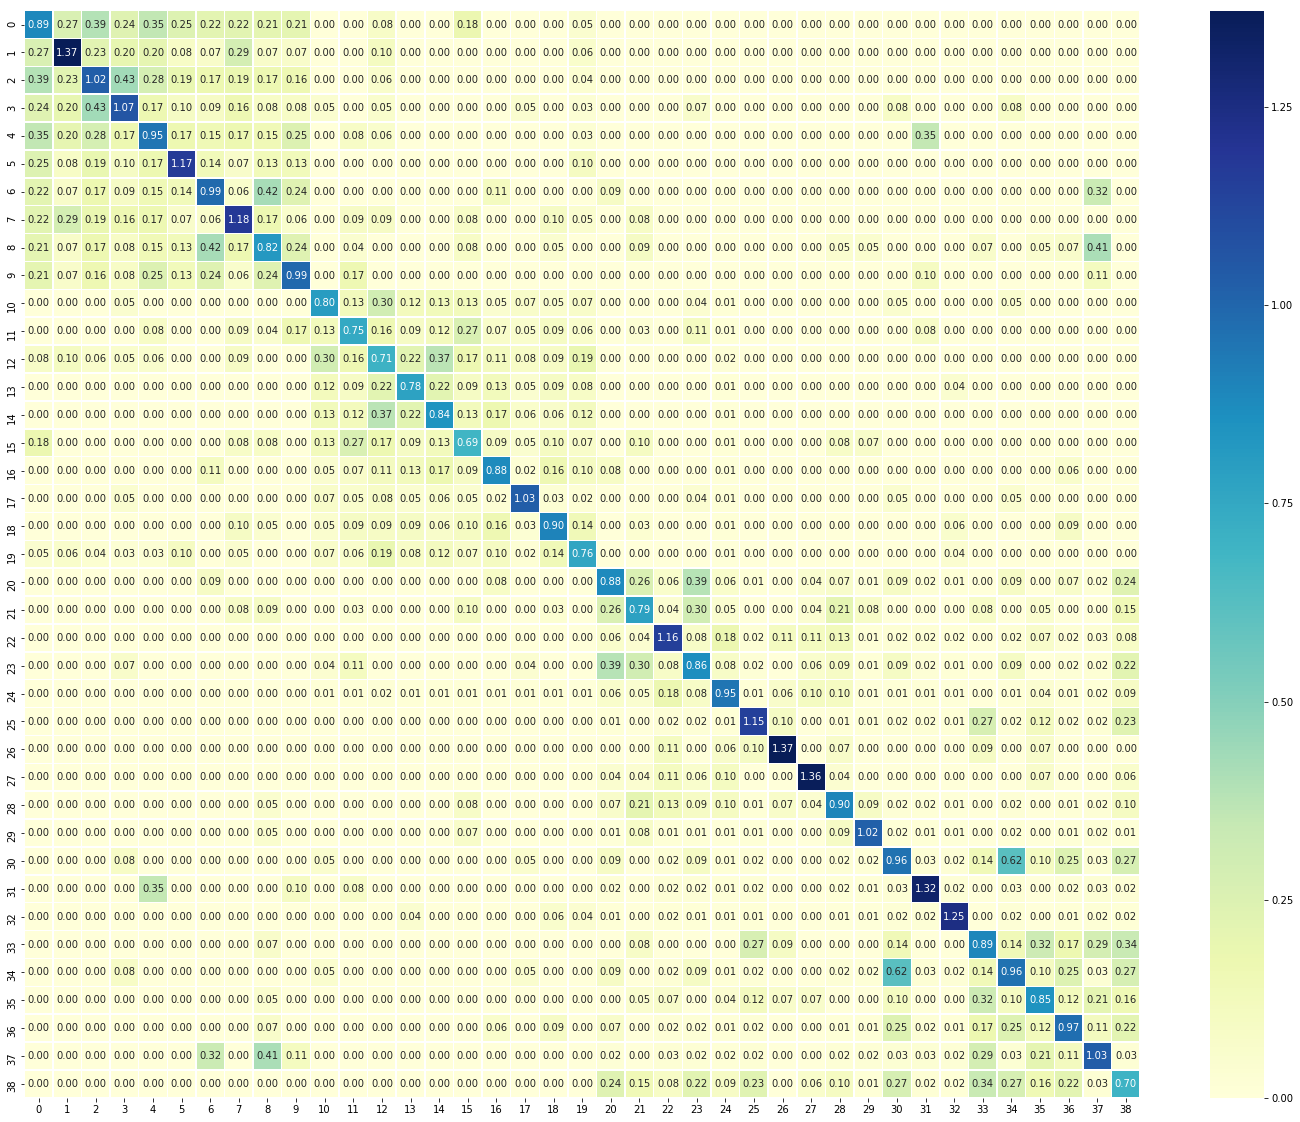

In [191]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(similarity_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

In [199]:
distance_matrix=np.max(similarity_matrix)-similarity_matrix

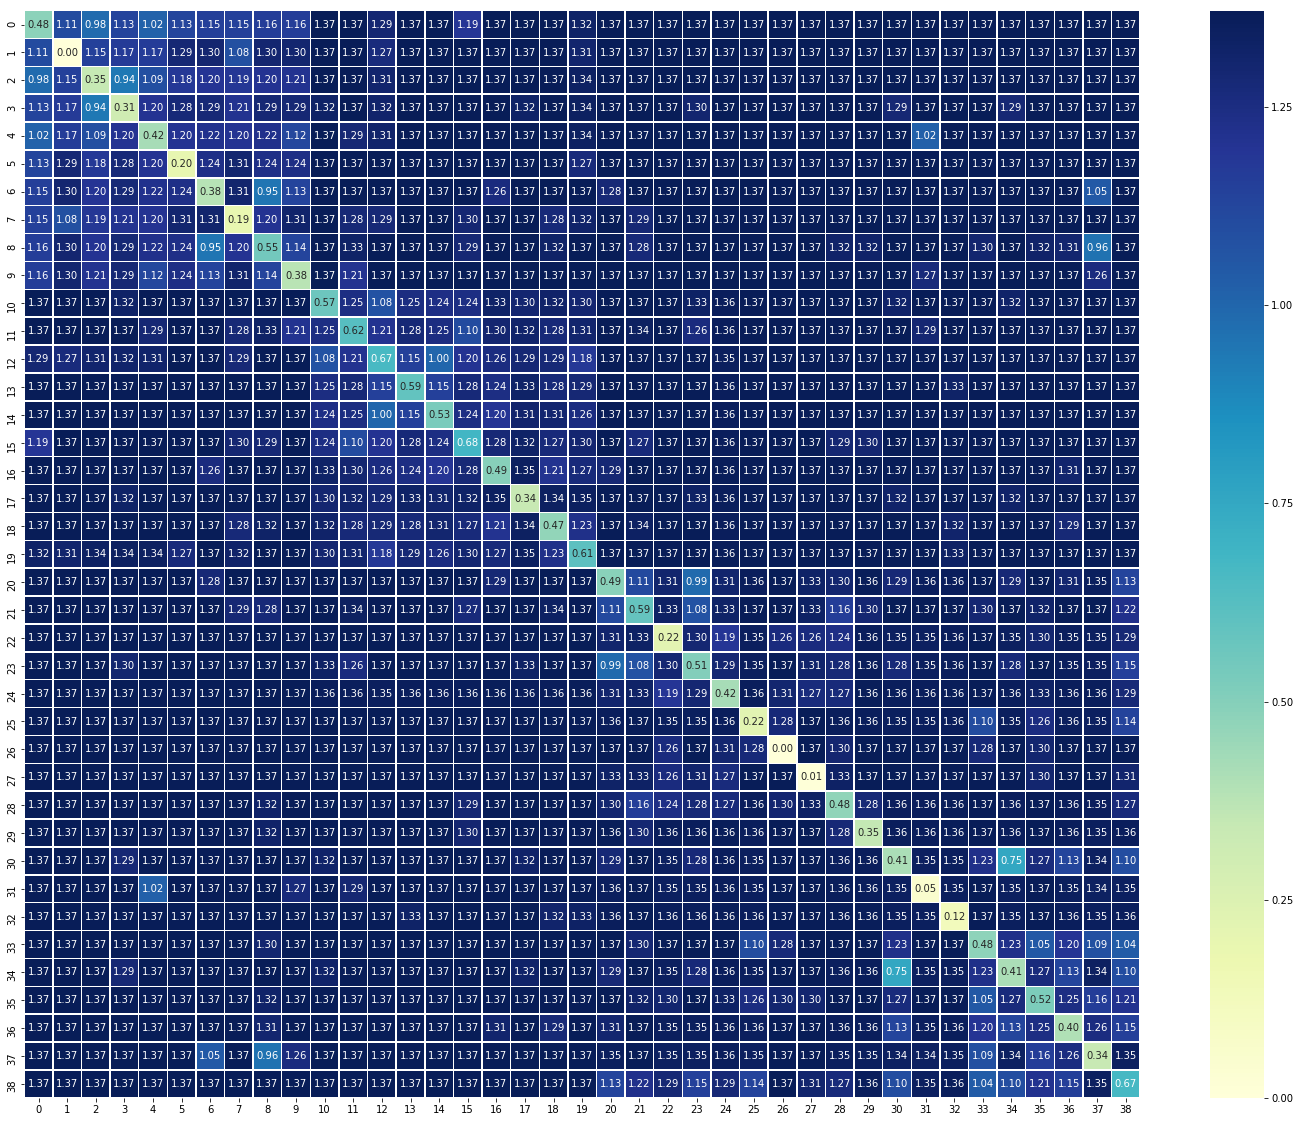

In [200]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(distance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

## Clustering

### K-Medoids

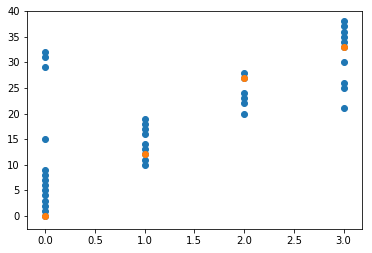

In [222]:
from pyclustering.cluster import kmedoids
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

##############################################################################################################################

matrix = distance_matrix
M, C = kMedoids(matrix, 4)

a=np.empty(shape=len(line))
for i in range(len(C)):
    for j in (C[i]):
        a[j]=i
    
#print(a)
arr = np.empty(shape=len(line))
for i in range(len(line)):
    arr[i]=i
m=[0,1,2,3]

#plt.figure(figsize=(15,10))
plt.scatter(a, arr)
plt.scatter(m,M)

### K-Means

[2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1
 2 1]


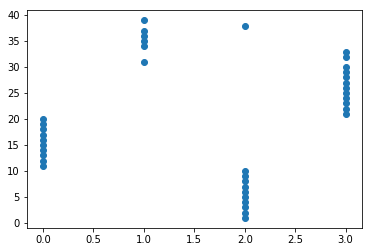

In [211]:
mat = distance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)
arr = [1, 2, 3 ,4, 5 , 6, 7, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,39]

#plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)